In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
!pip install mplfinance
import mplfinance as mpf

In [2]:
ticker = "THYAO.IS"
hisse = yf.Ticker(ticker)
hist = hisse.history(period="1y",interval="1d")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-13 00:00:00+03:00,312.602933,314.068259,311.137607,311.870270,22660735,0.0,0.0
2025-02-14 00:00:00+03:00,312.358723,315.533596,307.718523,309.428070,26200192,0.0,0.0
2025-02-17 00:00:00+03:00,310.160734,314.068270,307.230081,312.114502,31432655,0.0,0.0
2025-02-18 00:00:00+03:00,312.602915,319.441103,311.137589,317.487335,41069874,0.0,0.0
2025-02-19 00:00:00+03:00,317.243150,318.464255,309.672297,310.893402,32683908,0.0,0.0


In [3]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2025-02-13 00:00:00+03:00 to 2026-02-13 00:00:00+03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [4]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.0
mean,296.855294,300.324459,293.164203,296.342810,3.578501e+07,0.027318,0.0
std,20.696613,21.193096,20.459840,21.094430,1.548874e+07,0.306029,0.0
min,250.419754,251.409555,246.658506,249.429962,5.311968e+06,0.000000,0.0
25%,278.975108,281.588401,275.434278,278.125000,2.548951e+07,0.000000,0.0
50%,295.477858,298.591171,291.181885,294.268188,3.225363e+07,0.000000,0.0
75%,312.725045,316.812500,309.816723,312.548080,4.129717e+07,0.000000,0.0
max,341.481486,351.250000,337.250000,347.750000,1.043082e+08,3.442029,0.0


<Axes: >

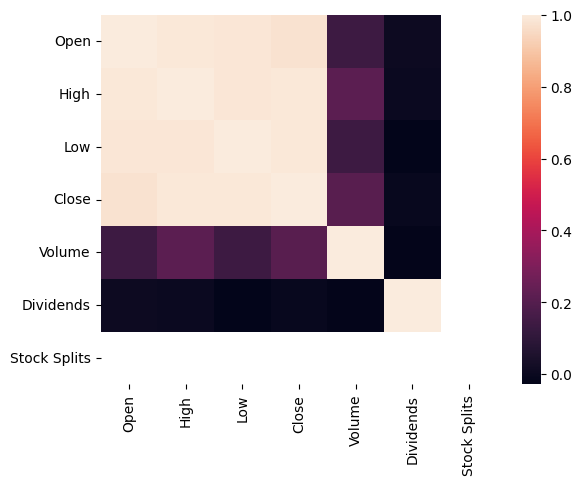

In [5]:
corr_matrix = hist.corr()
sns.heatmap(corr_matrix)

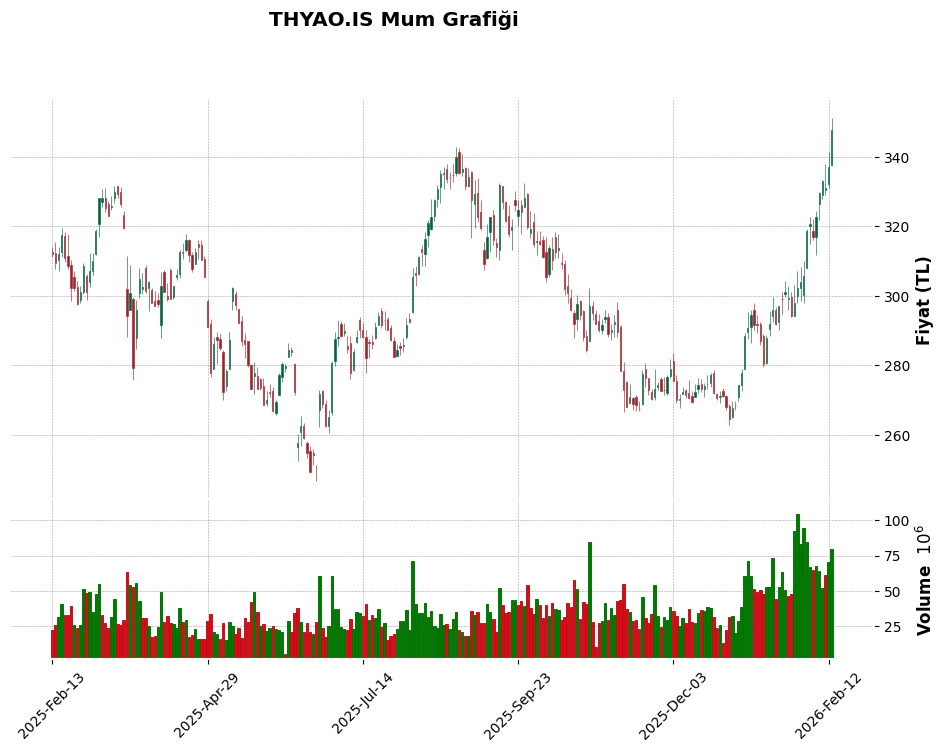

In [6]:
mpf.plot(hist, type='candle', style='charles',
         title=f'{ticker} Mum Grafiği',
         ylabel='Fiyat (TL)',
         volume=True, # İşlem hacmini de altına ekler
         figsize=(12, 8))

In [7]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
hist.to_csv("hisse_verisi.csv")

In [9]:
zaman_adimi = 10        # Geçmiş kaç güne bakarak tahmin yapılacak?
ozellik_sayisi = 1      # Kaç farklı değişken kullanılıyor? (şimdilik sadece "close" kullanıldığı için 1)
test_orani = 0.2        # Verinin ne kadarı test için ayrılacak?
epoch_sayisi = 50       # Eğitim tur sayısı
batch_boyutu = 16       # Her adımda işlenecek veri grubu büyüklüğü

In [10]:
data = hist['Close'].values.reshape(-1, 1) # LSTM 2D veya 3D veri ister
scaler = MinMaxScaler(feature_range=(0, 1)) # Değerler 0 ve 1 arasında olacak
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.63507205],
       [0.61023276],
       [0.6375561 ],
       [0.69220247],
       [0.62513646],
       [0.60029686],
       [0.53571459],
       [0.53819864],
       [0.49100349],
       [0.52577868],
       [0.60029686],
       [0.52577868],
       [0.58787721],
       [0.61520055],
       [0.70462242],
       [0.80149583],
       [0.79901209],
       [0.77168875],
       [0.74684915],
       [0.77665654],
       [0.81888358],
       [0.81143204],
       [0.78162465],
       [0.71207427],
       [0.45622862],
       [0.52329494],
       [0.30222416],
       [0.47361606],
       [0.56303793],
       [0.54068238],
       [0.52826274],
       [0.55310202],
       [0.49348755],
       [0.48355196],
       [0.49100349],
       [0.54316643],
       [0.52577868],
       [0.50342314],
       [0.50342314],
       [0.54316643],
       [0.57545757],
       [0.64252421],
       [0.64003984],
       [0.67729908],
       [0.63258799],
       [0.59284532],
       [0.64252421],
       [0.657

In [11]:
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, zaman_adimi)

# Örnek Sayısı otomatik olarak veriden hesaplanır
ornek_sayisi = X.shape[0]
print("örnek sayısı:",ornek_sayisi)
X = X.reshape(ornek_sayisi, zaman_adimi, ozellik_sayisi)

örnek sayısı: 241


In [12]:
split = int(ornek_sayisi * (1 - test_orani))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
print(f"Veri Yapısı: [Örnek: {ornek_sayisi}, Zaman Adımı: {zaman_adimi}, Özellik: {ozellik_sayisi}]")

model = Sequential([
    # İlk LSTM katmanı
    LSTM(units=50, return_sequences=True, input_shape=(zaman_adimi, ozellik_sayisi)),
    Dropout(0.2), # overfitting engellemek için

    # İkinci LSTM katmanı
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),

    # Çıkış katmanı (Sayısal bir değer döneceği için tek bir nöron)
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epoch_sayisi,
    batch_size=batch_boyutu,
    verbose=1
)

Veri Yapısı: [Örnek: 241, Zaman Adımı: 10, Özellik: 1]
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2081 - val_loss: 0.0154
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0421 - val_loss: 0.0206
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - val_loss: 0.0125
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - val_loss: 0.0133
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - val_loss: 0.0131
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - val_loss: 0.0142
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0174 - val_loss: 0.0108
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0192 - val_loss: 0.0118
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0176 - val_loss: 0.0111
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - val_loss: 0.0111
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0167 - val_l

In [14]:
tahminler = model.predict(X_test)
# Ölçeklendirmeyi geri al (0-1 arasından gerçek fiyatlara dön)
tahminler = scaler.inverse_transform(tahminler)
gercek_degerler = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step


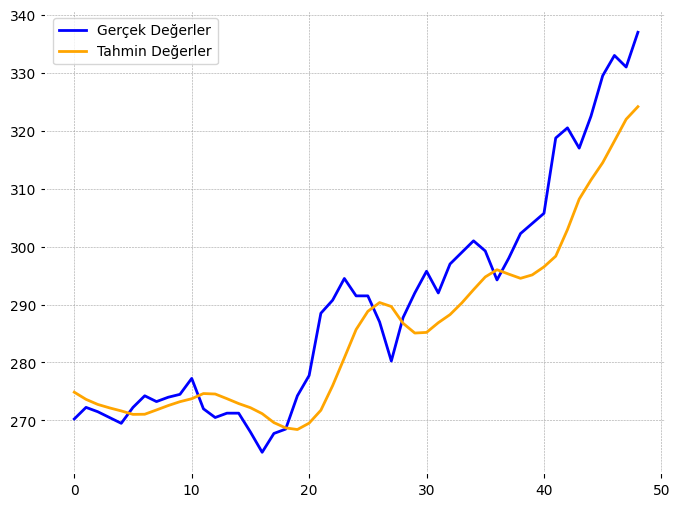

In [16]:
plt.figure(figsize=(8,6))
plt.plot(gercek_degerler,color="blue",label="Gerçek Değerler")
plt.plot(tahminler,color="orange",label="Tahmin Değerler")
plt.legend()

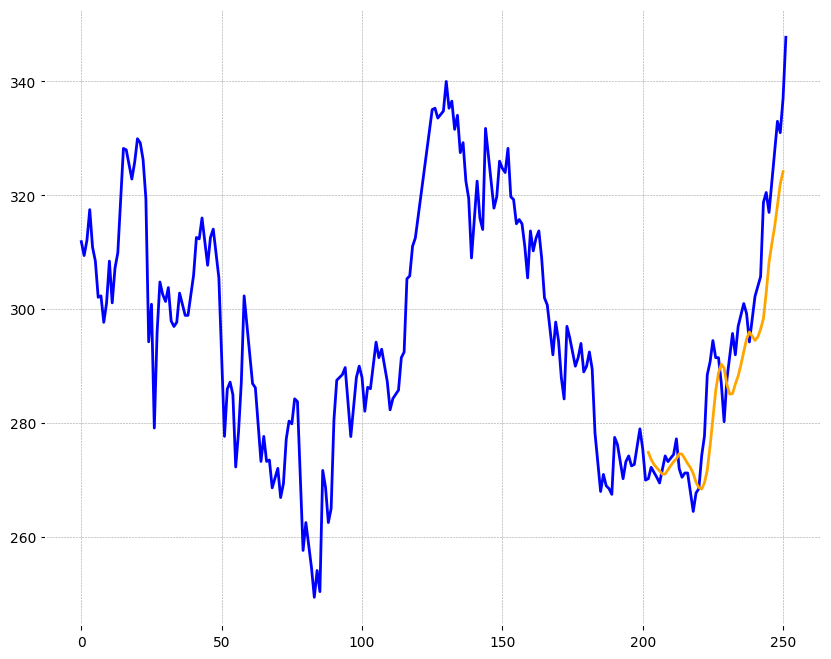

In [33]:
baslangic_index = split + zaman_adimi
tahmin_indexleri = np.arange(baslangic_index, baslangic_index + len(tahminler))
tahmin_serisi = pd.Series(tahminler.flatten(), index=tahmin_indexleri)

plt.figure(figsize=(10,8))
plt.plot(data, color="blue", label="Gerçek Değerler")
plt.plot(tahmin_serisi, color="orange", label="Tahmin Değerler")